# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset.

Add any relevant insight for future modelling.

# Imports

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [3]:
# Specify the path to the csv file you downloaded
path_to_csv = "C:/Users/gascm/OneDrive/Documents/HEC/DSB_2/MLOps_Artefact/abalone.csv"

In [5]:
# Read data
data = pd.read_csv(path_to_csv)

# EDA

In [6]:
data['age'] = data['Rings']+1.5

Univariate analysis

In [7]:
print('This dataset has {} observations with {} features.'.format(data.shape[0], data.shape[1]))

This dataset has 4177 observations with 10 features.


In [8]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'age'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [10]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


Key insights :

        - No missing values in the dataset
        - All numerical features but 'sex'
        - Though features are not normaly distributed, are close to normality
        - None of the features have minimum = 0 except Height (requires re-check)
        - Each feature has difference scale range

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>],
       [<Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

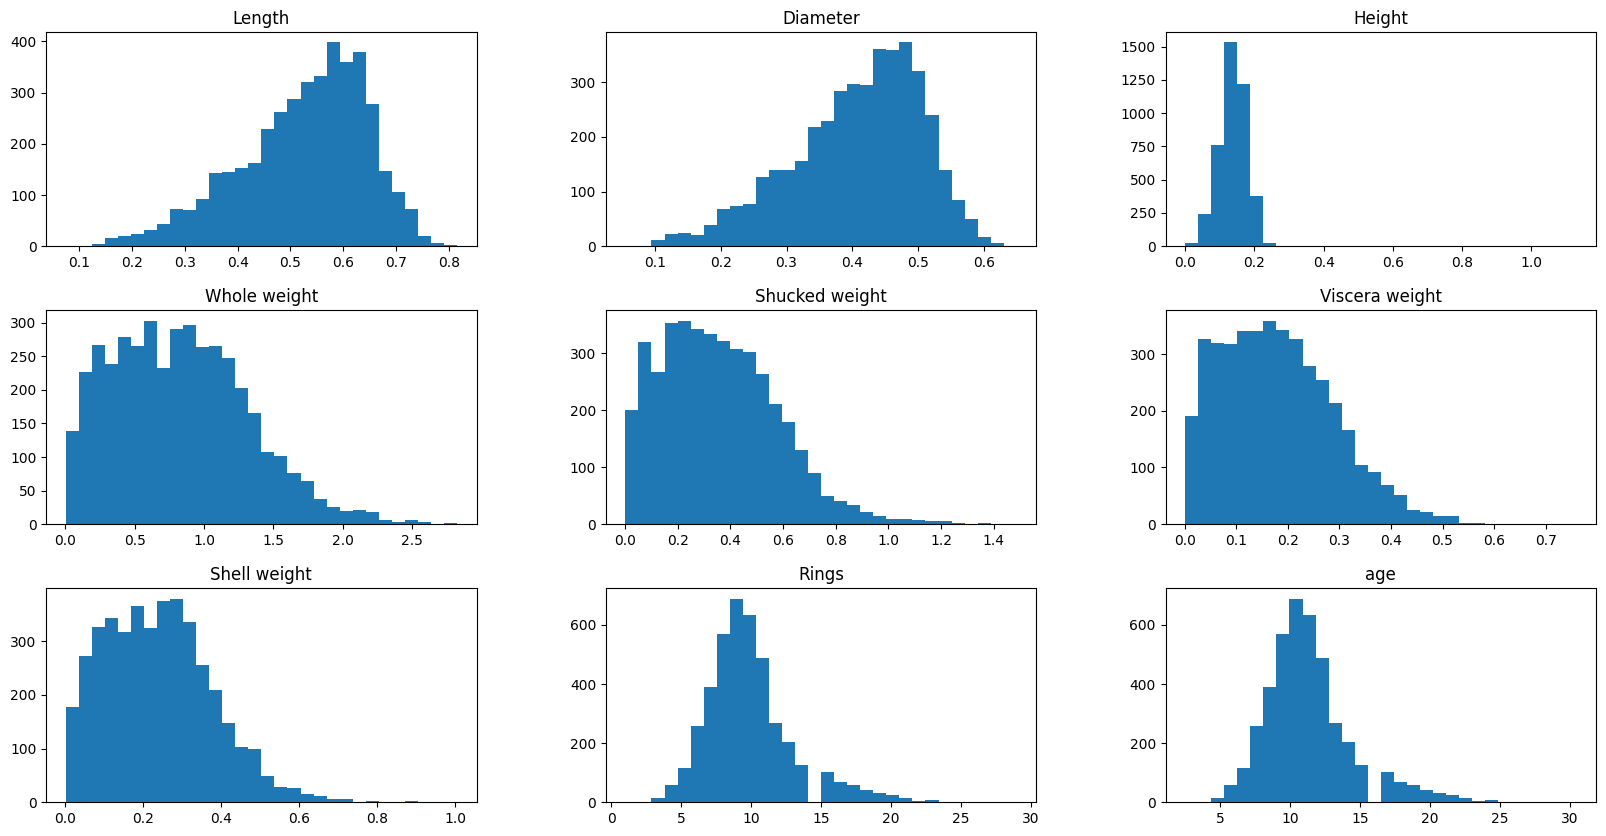

In [12]:
data.hist(figsize=(20,10), grid=False, bins = 30)

In [15]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object_]).columns

In [16]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'age'],
      dtype='object')

In [17]:
categorical_features

Index(['Sex'], dtype='object')

In [18]:
skew_values = skew(data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,Rings,1.113702
8,age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.

    - Height has highest skewedness followed by age, Shucked weight (can be cross verified through histogram plot)

In [19]:
# Missing values
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
Rings,0,0.0
age,0,0.0


No missing values as said before.

C:\Users\gascm\AppData\Local\Temp\ipykernel_12764\2165262424.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sex', data = data, palette="Set3")


<Axes: xlabel='Sex', ylabel='count'>

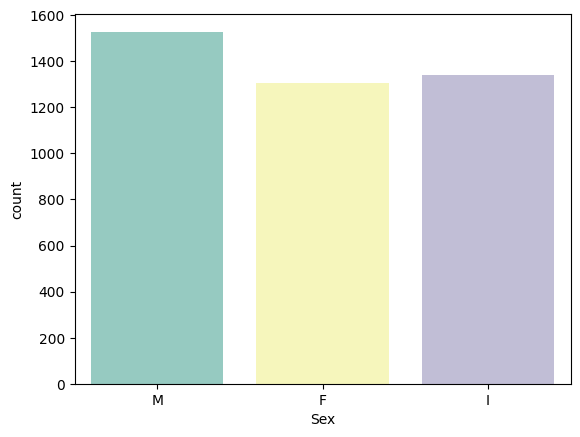

In [20]:
sns.countplot(x = 'Sex', data = data, palette="Set3")

c:\Users\gascm\OneDrive\Documents\HEC\DSB_2\MLOps_Artefact\.project\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\gascm\OneDrive\Documents\HEC\DSB_2\MLOps_Artefact\.project\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\gascm\OneDrive\Documents\HEC\DSB_2\MLOps_Artefact\.project\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Sex', ylabel='age'>

c:\Users\gascm\OneDrive\Documents\HEC\DSB_2\MLOps_Artefact\.project\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\gascm\OneDrive\Documents\HEC\DSB_2\MLOps_Artefact\.project\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\gascm\OneDrive\Documents\HEC\DSB_2\MLOps_Artefact\.project\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


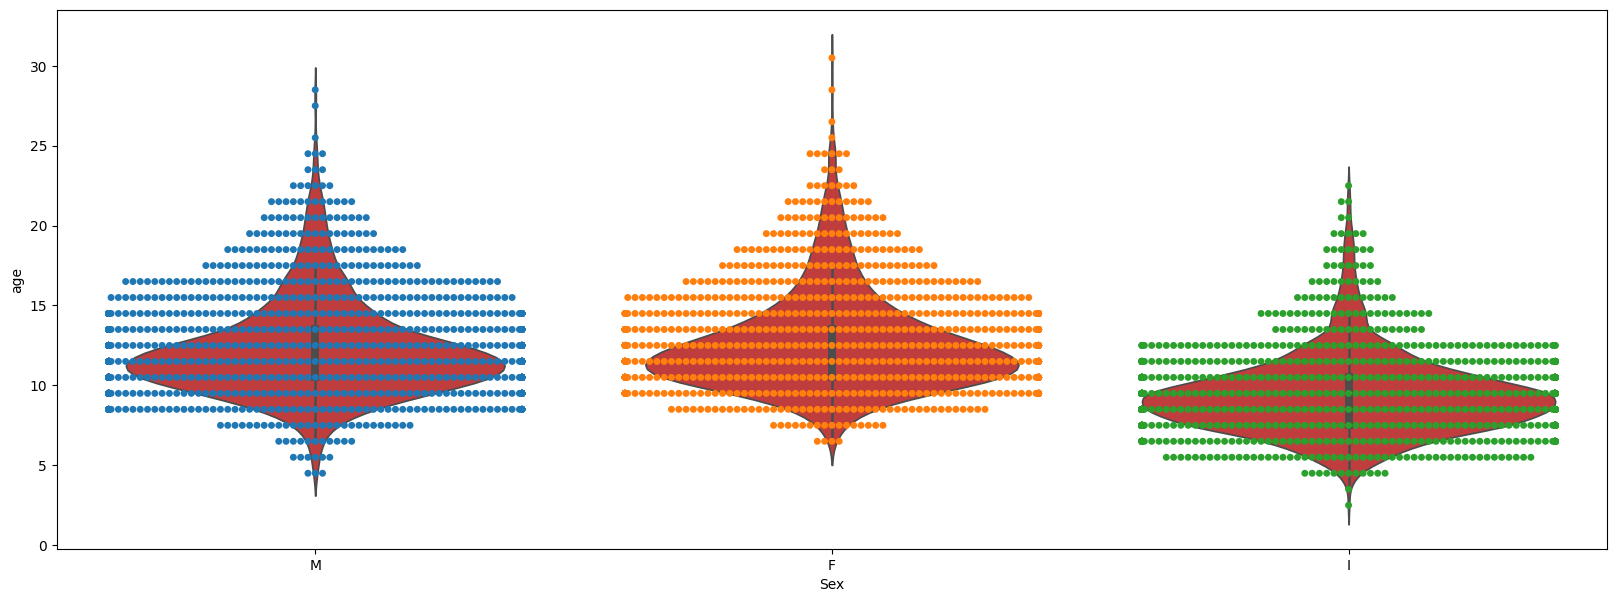

In [21]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age', data = data)

    Male : age majority lies in between 7.5 years to 19 years
    Female: age majority lies in between 8 years to 19 years
    Immature: age majority lies in between 6 years to < 10 years

In [22]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


### Bivariate analysis

Bivariate analysis is vital part of data analysis process for, it gives clear picture on how each features are affected in presence of other features.
It also helps us understand and identify significance features, overcome multi-collinearity effect, inter-dependency and thus, provides insights on hidden data noise pattern.

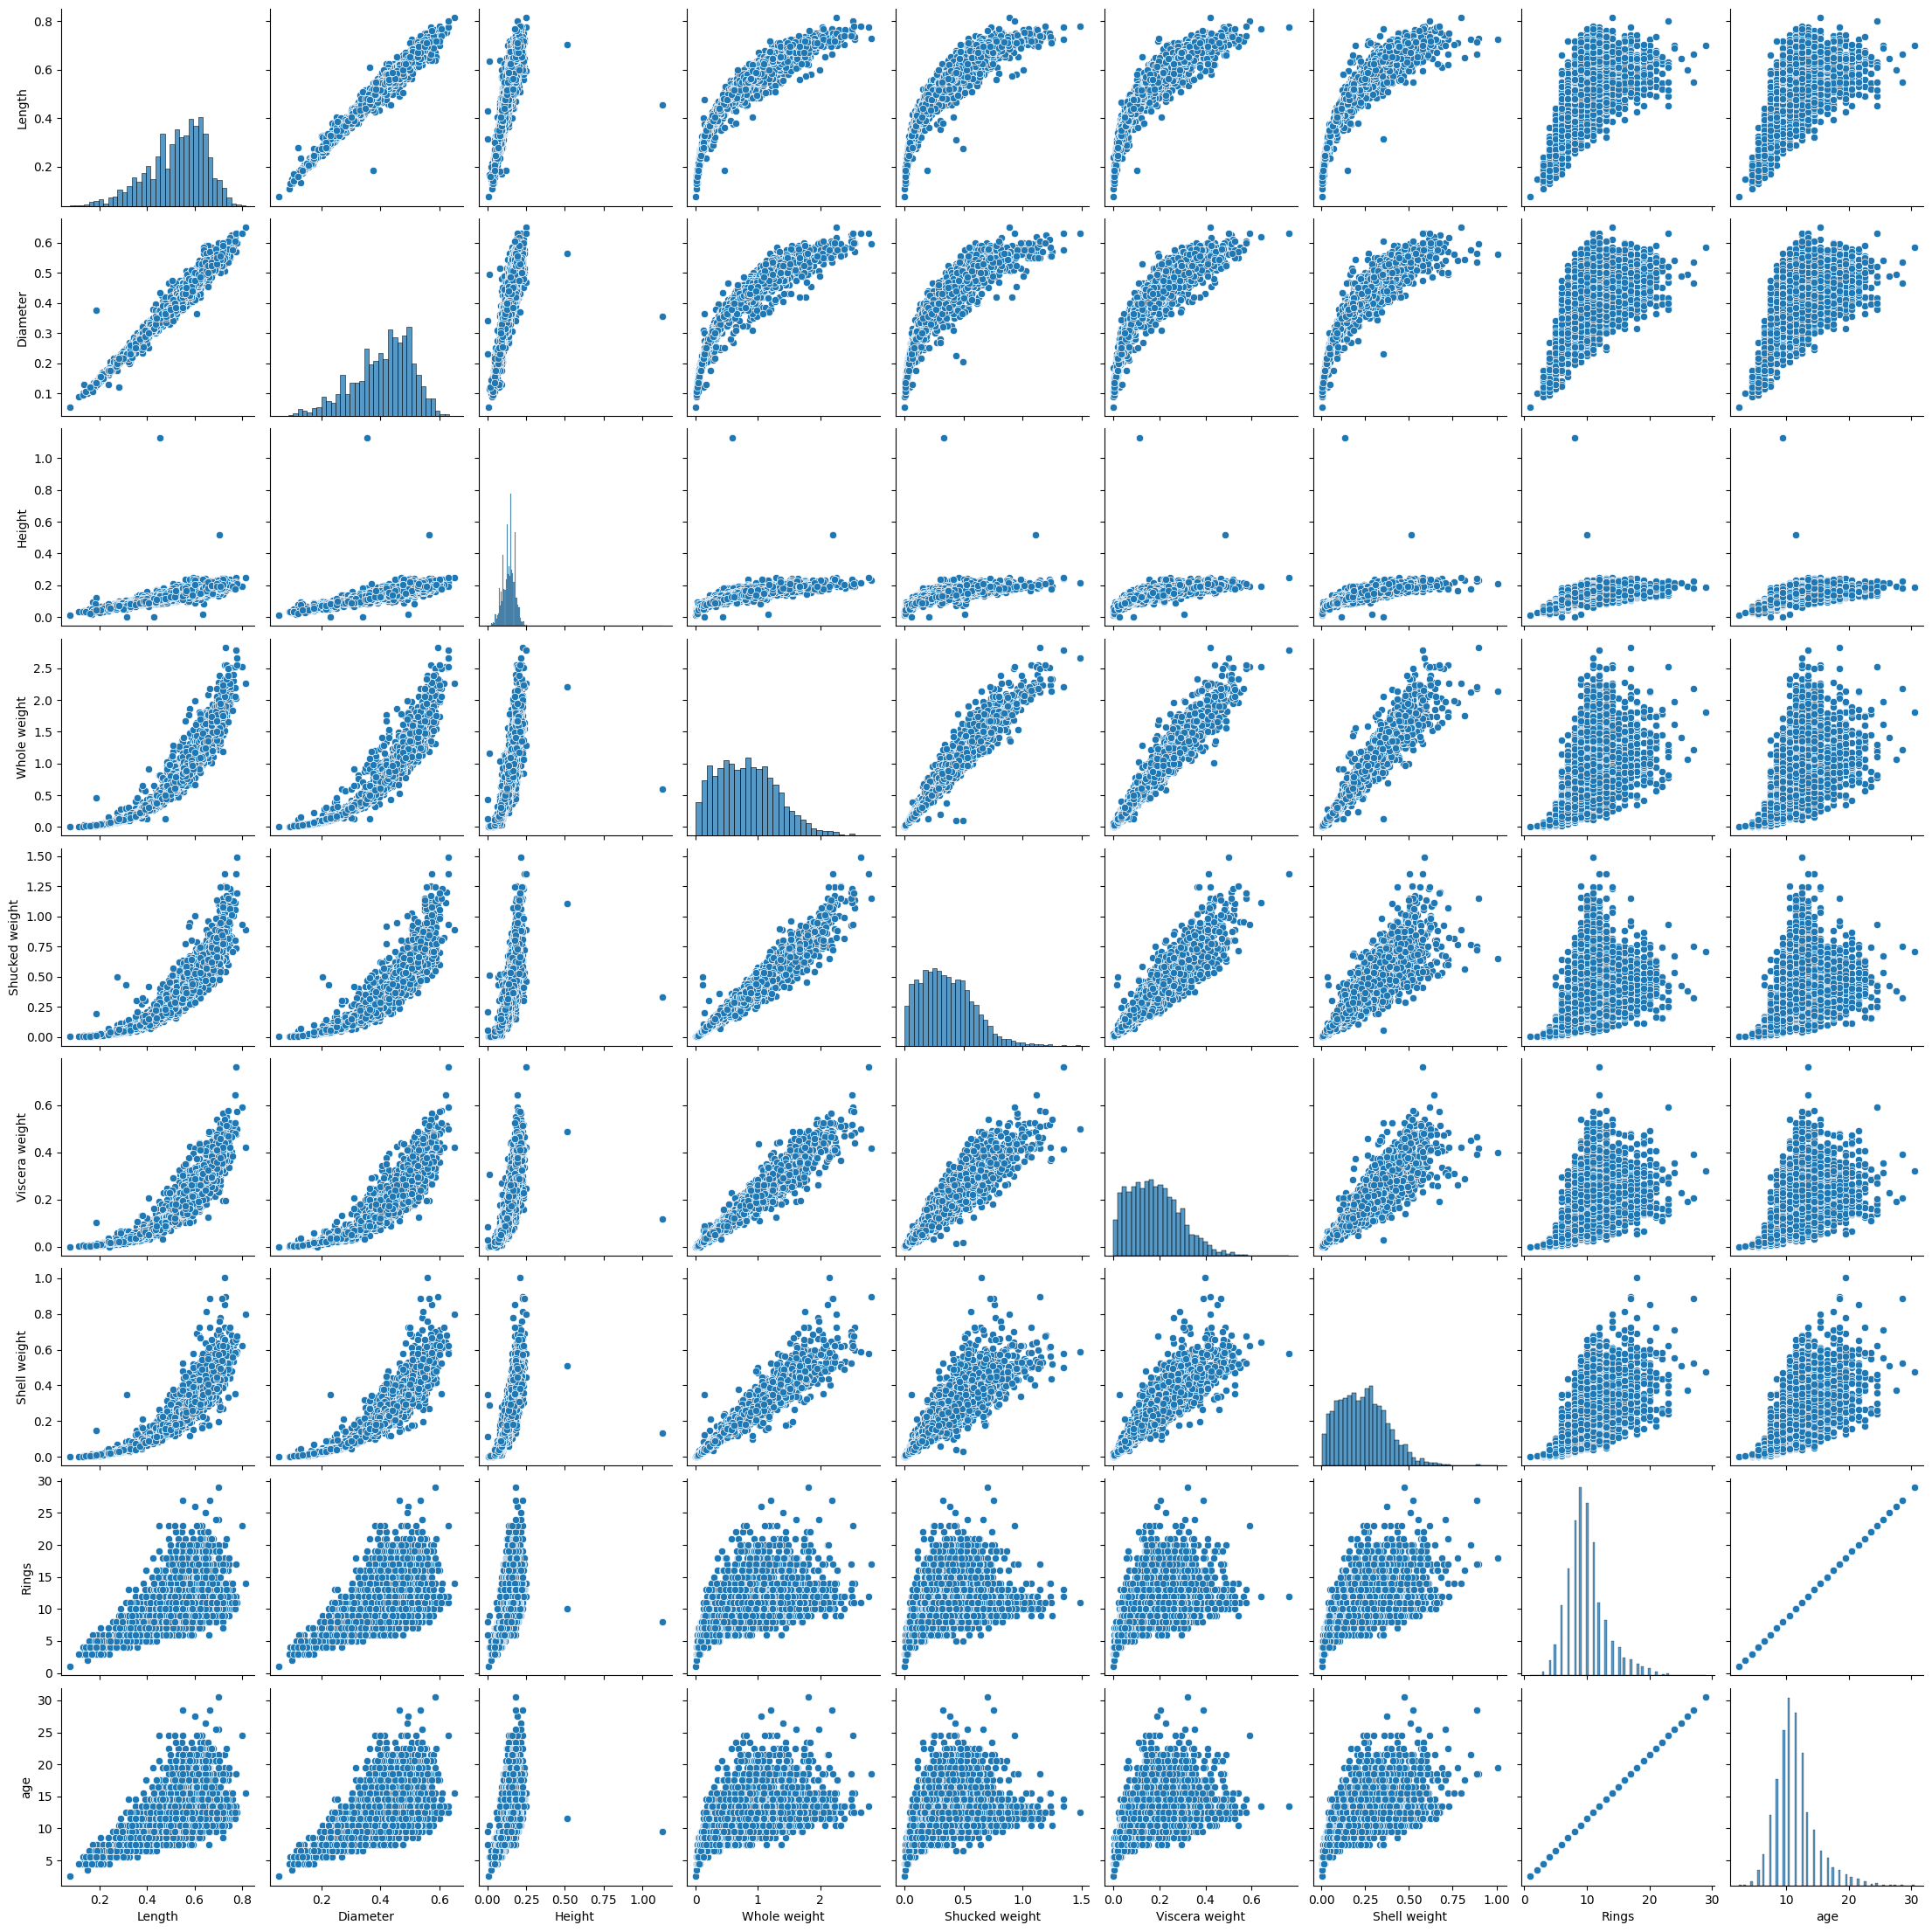

In [23]:
sns.pairplot(data[numerical_features])

Key insights: length is linearly correlated with diameter while, non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight.

<Axes: >

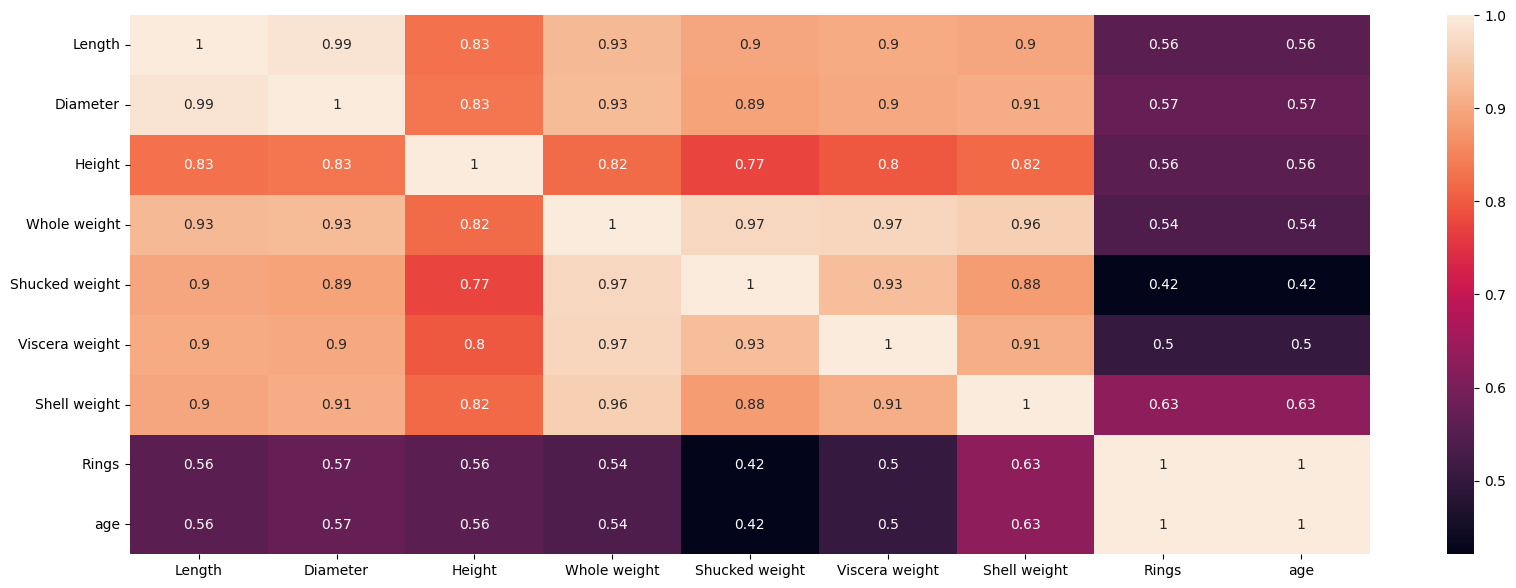

In [24]:
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_features].corr(), annot=True)

    Whole Weight is almost linearly varying with all other features except age
    Heigh has least linearity with remaining features
    Age is most linearly proprtional with Shell Weight followed by Diameter and length
    Age is least correlated with Shucked Weight

Such high correlation coefficients among features can result into multi-collinearity. We need to check for that too, however, we have not done it here.